# Final Project Baseline Models

STAT 451: Machine Learning (Fall 2021)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)   

---



This notebook is used to display the variety of models that were fit to the 3 second dataset

This notebook will include

* Models
* Accuracy metrics including the holdout method, cross-validation, and bootstrap methods
* Hyperparameter tuning

In [1]:
%load_ext watermark
%watermark  -d -u -a 'William Ryan' -v -p numpy,scipy,matplotlib,sklearn,pandas

Author: William Ryan

Last updated: 2021-12-05

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.28.0

numpy     : 1.20.3
scipy     : 1.7.1
matplotlib: 3.4.3
sklearn   : 1.0
pandas    : 1.3.3



In [65]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_path = '../data/Data/features_3_sec.csv'
df = pd.read_csv(data_path)
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
df.shape

(9990, 60)

In [5]:
labels = df['label'].unique()
labels

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [6]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.label)
df['label'] = le.transform(df.label)
df['label']

0       0
1       0
2       0
3       0
4       0
       ..
9985    9
9986    9
9987    9
9988    9
9989    9
Name: label, Length: 9990, dtype: int64

In [7]:
labels = df['label'].unique()
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Baseline Models

We will use these models to understand the baseline accuracy of very simple versions of the models

We organize roughly by model complexity

We will simply use the holdout method for a performance estimate

In [8]:
y = df['label'].values
X = df.iloc[:, 1:-1].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     train_size=0.7,
                     stratify=y,
                     random_state=0)

#### Logisitic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

trans = StandardScaler()

model = LogisticRegression(multi_class = 'multinomial',
                           max_iter = 300,
                           random_state=0)

clf = make_pipeline(trans, model)
clf.fit(X_train, y_train)
lr_score = clf.score(X_test, y_test)
print(f"Train Accuracy: {clf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {lr_score*100:0.3f}%")

Train Accuracy: 74.617%
Test Accuracy: 72.973%


#### K-Nearest Neighbors

In [92]:
from sklearn.neighbors import KNeighborsClassifier

trans = StandardScaler()

model = KNeighborsClassifier(n_neighbors=3) #weights='distance', p=1)

clf = make_pipeline(trans, model)
clf.fit(X_train, y_train)
knn_score = clf.score(X_test, y_test)
print(f"Train Accuracy: {clf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {knn_score*100:0.3f}%")

Train Accuracy: 95.281%
Test Accuracy: 89.022%


#### Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

trans = StandardScaler()

model = GaussianNB(priors=None)

clf = make_pipeline(trans, model)
clf.fit(X_train, y_train)
nb_score = clf.score(X_test, y_test)
print(f"Train Accuracy: {clf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {nb_score*100:0.3f}%")

Train Accuracy: 52.510%
Test Accuracy: 52.286%


#### SVMs

In [26]:
from sklearn import svm

trans = StandardScaler()

model = svm.SVC(decision_function_shape='ovo', random_state=0)

clf = make_pipeline(trans, model)
clf.fit(X_train, y_train)
svm_score = clf.score(X_test, y_test)
print(f"Train Accuracy: {clf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {svm_score*100:0.3f}%")

Train Accuracy: 91.949%
Test Accuracy: 85.152%


In [13]:
lin_clf = svm.LinearSVC(max_iter = 300, random_state=0)
clf = make_pipeline(trans, lin_clf)
clf.fit(X_train, y_train)
print(f"Train Accuracy: {clf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {clf.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 72.987%
Test Accuracy: 71.338%


/Users/will/.conda/envs/myenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [14]:
nu_clf = svm.NuSVC(random_state=0)
clf = make_pipeline(trans, nu_clf)
clf.fit(X_train, y_train)
print(f"Train Accuracy: {clf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {clf.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 75.547%
Test Accuracy: 72.439%


#### Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
dt_score = clf.score(X_test, y_test)
print(f"Train Accuracy: {clf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {dt_score*100:0.3f}%")

Train Accuracy: 99.914%
Test Accuracy: 65.732%


#### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
rf_score = clf.score(X_test, y_test)
print(f"Train Accuracy: {clf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {rf_score*100:0.3f}%")

Train Accuracy: 99.914%
Test Accuracy: 86.520%


#### Bagging Classifier

In [30]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
bagging_score = clf.score(X_test, y_test)
print(f"Train Accuracy: {clf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {bagging_score*100:0.3f}%")

Train Accuracy: 99.399%
Test Accuracy: 77.578%


#### Scikit-learn Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
gb_score = clf.score(X_test, y_test)
print(f"Train Accuracy: {clf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {gb_score*100:0.3f}%")

Train Accuracy: 96.253%
Test Accuracy: 82.950%


#### Scikit-learn Histogram Based Gradient Boosting

In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(random_state=123)
clf = clf.fit(X_train, y_train)
hist_gb_score = clf.score(X_test, y_test)
print(f"Train Accuracy: {clf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {hist_gb_score*100:0.3f}%")

Train Accuracy: 99.914%
Test Accuracy: 89.623%


#### XGBClassifier

In [21]:
#import time

#start = time.time()
#from xgboost import XGBClassifier
#xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05, use_label_encoder=False, tree_method = "hist")
#xgb.fit(X_train, y_train)


#preds = xgb.predict(X_test)

#print('Accuracy', ':', round(accuracy_score(y_test, preds), 5))
#end = time.time()
#print("Model training and prediction made in {}".format(end - start))

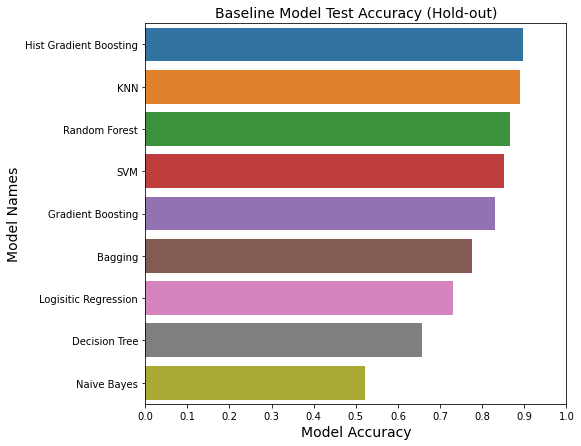

In [102]:
# Plot model test accuracy

model_scores = [
    lr_score,
    knn_score,
    nb_score,
    svm_score,
    dt_score,
    rf_score,
    bagging_score,
    gb_score,
    hist_gb_score
]

model_names = ['Logisitic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'Bagging', 'Gradient Boosting', 'Hist Gradient Boosting']

scores_df = pd.DataFrame(data = model_scores, columns = ['Model Accuracy'])
names_df = pd.DataFrame(data = model_names, columns = ['Model Names'])

vis_df = pd.concat([scores_df, names_df], axis = 1)

vis_df = vis_df.sort_values(by=['Model Accuracy'], ascending=False)

fig, ax = plt.subplots(figsize=(9, 7))

sns.barplot(x = 'Model Accuracy', y =  'Model Names', data = vis_df)

plt.title('Baseline Model Test Accuracy (Hold-out)', fontsize = 14)
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Model Accuracy', fontsize = 14)
plt.ylabel('Model Names', fontsize = 14)
plt.subplots_adjust(left=0.25)
plt.savefig("Baselineacc.jpg")

# Conclusions

As we can see, the models with the best performance are K-Nearest Neighbors, SVM, Random forest, and Histogram based Gradient boosting.